# Automatic Essay Scoring (AES)

Automatic Essay Scoring (AES) é uma tarefa de machine learning que consistem em atribuir uma nota para redação de maneira automática.
No geral, diversas abordagens na literatura apresentaram resultados significativos na tentativa de realizar esse processo utilizando diversas técnicas e algoritmos focando em diferentes aspectos como analise da corretude gramatical, existência de estrutura retórica entre outras.

Essencialmente, AES consiste em duas principais abordagens, a primeira usa regressão para atribuir uma nota ao texto de entrada, enquanto a segunda tenta classificar a nota em um intervalo predeterminado e fixo, por exemplo, (e.g 0, 50, 100, 150, 200) . Além disso,  podemos ainda dividir as notas por rubricas, aspectos especificos do texto que são avaliados como, por exemplo, apenas a gramatica, ou apenas a argumentação do texto etc.

Nesse contexto, a correção automática de redações do ENEM, por exemplo, tem sido tema de diversos artigos da área que empregam uma diversidade de técnicas com esse fim. Um dos objetivos para isso é a redução do tempo de correção e do custo operacional para isso. Assim, várias artigos, diversas técnicas foram empregadas, tanto aquelas que buscam uma classificação holistica (classificação da nota final) como aquelas que buscam uma classificação por rúbrica (classificação de um aspecto especifico).


Dessa maneira, nesse trabalho, para fins de simplicidade, iremos aplicar técnicas de classificação da nota final de redações do enem. Utilizaremos para isso o conjunto de dados de redações do UOL que contém 4570 redações em diferentes assuntos. Para atribuir uma nota, iremos utilizar um conjunto de classificadores extraindo diversas características relacionadas as aspectos como legibilidade, coesão, coerência e outros para assim classificar a nota entre 0, 50, 100, 150 e 200.



## Carregando os Dados 

Como abordado em diversos artigos, uma forma de realizar a classificação de redação é usando extração de características do texto. Usamos a biblioteca aibox-nlp para realizar a extração das características do texto, ao total foram 144 relacionadas a características do texto como oração por sentença, adverbios antes do verbio principal e etc. Além disso, os dados foram normalização usando z-score scaling. A normalização normal com z-score faz com que todas as features tenha uma média centrada em zero e desvio padrão em 1, o que tem um impacto significativo na performance de modelos como KNN e LogisticRegression.
As features foram extraídas em um arquivo .csv devido ao longo tempo de processamento requirido para extrair todas elas. Os dados foram dividos em 80% em treinamento e 20% em teste, usamos Syntetic Minority Oversampling Technique (SMOTE) para aumentar a classe minoritária e evitar vieses.
Por fim, dividimos todas as notas em 5 categorias: 

| classe | Original | Agrupada |
|:------:|:--------:|:--------:|
|    1   |   0-200  |     0    |
|    2   |  200-400 |    0.5   |
|    3   |  400-600 |     1    |
|    4   |  600-800 |    1.5   |
|    5   | 800-1000 |     2    |

Como apresentado no artigo [Imbalanced Learning Techniques for Improving the Performance of Statistical Models in Automated Essay Scoring](https://www.sciencedirect.com/science/article/pii/S187705091931422X?via%3Dihub) e no conjunto de [redações do uol](https://github.com/gpassero/uol-redacoes-xml).


In [1]:
import pandas as pd 

TRAIN_X_PATH = "../data/features/essay_train_smote.csv"
TEST_X_PATH = "../data/features/essay_test_scaled.csv"

train_data = pd.read_csv(TRAIN_X_PATH)
test_data = pd.read_csv(TEST_X_PATH)
test_data

,adapted_dalechall,adverbs_before_main_verb_ratio,brunet_indice,clauses_per_sentence,cncadc,cncadd,cncall,cncalter,cnccaus,cnccomp,...,wrdprp1p,wrdprp1s,wrdprp2,wrdprp2p,wrdprp2s,wrdprp3p,wrdprp3s,wrdverb,yule_k,target
0,-1.347021,-0.472203,0.515769,-0.601238,0.484122,2.789352,2.585322,-0.951121,0.399652,-0.029367,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,0.682136,-0.097384,2
1,2.198038,-0.094002,-0.845537,2.297294,-1.104210,-0.358636,-0.660713,-0.951121,-0.723540,-1.163243,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-1.136700,-0.453588,2
2,-0.748844,-0.158640,0.694646,-0.553634,0.484122,1.215358,1.165182,-0.276757,0.175013,0.650958,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,1.028580,0.090033,3
3,-0.273935,-0.708062,-0.519672,-0.262723,0.484122,-0.183748,-0.052081,-0.951121,-0.498902,-0.709693,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-0.703644,-0.278633,3
4,0.741819,1.049592,-1.005242,-0.169632,-1.104210,-0.008859,-0.457836,0.397606,-0.948178,-0.936468,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-0.876866,-0.294454,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,-0.289360,1.037161,-0.970195,-1.141921,-0.310044,0.166029,-0.254958,-0.951121,-0.723540,-0.936468,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-0.703644,-0.538463,3
1309,0.093935,1.931319,-0.538516,-0.844545,-1.104210,-0.708412,-0.863590,-0.951121,0.399652,0.650958,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-0.270588,-0.473280,3
1310,-0.486612,-0.481830,0.578151,0.371992,-0.310044,-0.708412,-0.863590,-0.276757,0.848928,0.650958,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,0.335691,-0.126376,2
1311,-0.499639,-0.946864,0.195966,-0.355815,-1.104210,0.340917,-0.254958,0.397606,0.624290,0.650958,...,-0.181715,-0.084029,-0.128131,-0.034467,-0.124436,-0.456054,-0.469185,-0.443810,0.305634,4


### Treinando com Modelos


Primeiramente, escolhemos treinar 3 modelos "caixa preta", que apriore não possuem uma fácil interpretabilidade, mas tendem a ter uma perfamance significativamente melhor são eles Random Forest, Support Vector Machines e Logistic Regression. Depois disso, utilizaremos o modelo Decision Tree a fim de interpretar as saídas do melhor modelo de acordo com a métrica quadratic kappa, amplamente utilizada na avaliação de modelos de geração de pontuação automática de redação.

In [2]:
feature_names = train_data.columns[:-1]
class_names = [0, 0.5, 1., 1.5, 2.]

X_train = train_data.loc[:, feature_names].to_numpy()
Y_train = train_data.target.to_numpy()

X_test = test_data.loc[:, feature_names].to_numpy()
Y_test = test_data.target.to_numpy()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rf_clf = RandomForestClassifier(max_depth=12, random_state=0).fit(X_train, Y_train)
svc_clf = SVC(kernel="linear", C=0.025).fit(X_train, Y_train)
lr_clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
clf_list = [svc_clf,rf_clf,lr_clf ]

/opt/conda/envs/aibox-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from collections import defaultdict
from sklearn import metrics
import pandas as pd

def compute_metrics(models_list, x_test, y_test, metric_dict = {
        "cohen_kappa_score": {"weights":"quadratic"}
    }):

    """
    Computa as métricas relacionadas ao smodelos retornando um dataframe pandas com o nome do 
    modelo a métrica e valor.
    models_list: list de modelos a serem avaliados
    x_test: conjunto de teste
    y_test: classes alvo 
    metric_dict: dicionário com métrica e parametros
    """

    report = defaultdict(list)
    metric_names = list(metric_dict.keys())
    for clf in models_list:
        y_hat = clf.predict(x_test)
        for metric in metric_names:
            score = getattr(metrics, metric)(y_hat, y_test, ** metric_dict[metric])
            report[clf.__class__.__name__].append(score)

    return pd.DataFrame.from_dict(report, orient='index', columns=metric_names).round(3)

### Analise dos Resultados

A métrica Quadratic Kappa é utilizada para avaliação de redações em diferentes trabalhos para mineração de dados educacionais [[2]](https://journals-sol.sbc.org.br/index.php/rbie/article/view/2869/2211). A métrica varia entre -1 (pior valor) e + 1 melhor valor e mede o nível de concordância entre dois anotadores em relação a uma métrica comum, nesse caso, a nota do aluno. Dessa forma, comparamos a nota fornecida por cada um dos modelos pela nota original dos anotadores. Assim, podemos concluir que o melhor modelo nesse contexto é o Random Forest que obtem um resultado de 0.513 contra 0.431 do Logistic Regression e 0.420 do Support Vector Machines.

In [5]:

result = compute_metrics(clf_list, X_test, Y_test)
result


,cohen_kappa_score
SVC,0.420
RandomForestClassifier,0.513
LogisticRegression,0.431


In [6]:
# Gerar e plotar a matriz de confusão de forma mais visual
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(clf, x_test, y_test):

    y_hat = clf.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_hat)

    # Plotar a matriz de confusão com heatmap
    labels = ['0', '0.5', '1', '1.5', '2']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {clf.__class__.__name__}')
    plt.show()

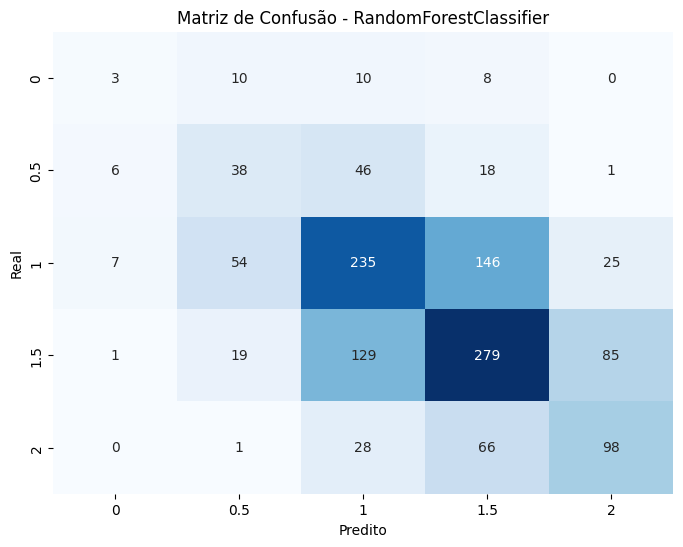

In [7]:

plot_confusion_matrix(rf_clf, X_test, Y_test)

Através da matrix de confusão podemos verificar a distribuição dos acertos do modelo em relação a classe a ser predita. Nele podemos ver que o modelo tem mais facilidade em acerta classes 1 e 1.5 (com maiores exemplos) do que as classes sub-representadas como 0 e 2.

## Explicabilidade

### Explicabilidade Global

#### Global Surrogates

Global Surrogates é uma forma de explicabilidade que usa um modelo caixa branca, explicável para entender as saídas de um modelo caixa preta (não explicável).
É uma tentativa de obter uma explicação geral sobre o resultado final do modelo ao invés de explicar apenas uma saída.

No nosso caso, iremos utilizar o modelo Decision tree, caixa branca, para tentar explicar as saídas dos modelos caixa preta nesse caso Random Forest e Linear Regression.

In [8]:
from sklearn.tree import DecisionTreeClassifier

Y_hat = rf_clf.predict(X_test)
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_test, Y_hat)
Y_hat_dt = dt_clf.predict(X_test)
print("Global Sogarrote accuracy: ", metrics.cohen_kappa_score(Y_hat, Y_hat_dt, weights="quadratic" ))

Global Sogarrote accuracy:  0.7911878433105576


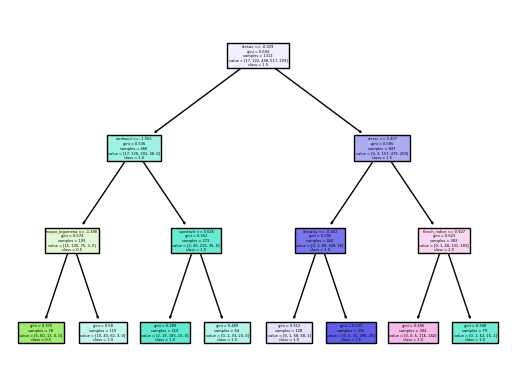

In [9]:
from sklearn import tree


tree.plot_tree(dt_clf, feature_names = feature_names, 
                    class_names=[str(cls_name) for cls_name in class_names],filled = True);

In [10]:
import numpy as np

n_nodes = dt_clf.tree_.node_count
children_left = dt_clf.tree_.children_left
children_right = dt_clf.tree_.children_right
feature = dt_clf.tree_.feature
threshold = dt_clf.tree_.threshold
values = dt_clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if {feature} <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature_names[feature[i]].upper(),
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node with value=[[ 17. 122. 448. 517. 209.]]: go to node 1 if DESWC <= -0.43910881876945496 else to node 8.
	node=1 is a split node with value=[[ 17. 120. 291.  38.   0.]]: go to node 2 if WRDNOUN <= -1.0545501112937927 else to node 5.
		node=2 is a split node with value=[[ 15. 100.  75.   3.   0.]]: go to node 3 if HAPAX_LEGOMENA <= -1.387585163116455 else to node 4.
			node=3 is a leaf node with value=[[ 5. 60. 13.  0.  0.]].
			node=4 is a leaf node with value=[[10. 40. 62.  3.  0.]].
		node=5 is a split node with value=[[  2.  20. 216.  35.   0.]]: go to node 6 if SYNSTRUTT <= 0.6264251470565796 else to node 7.
			node=6 is a leaf node with value=[[  2.  19. 183.  15.   0.]].
			node=7 is a leaf node with value=[[ 0.  1. 33. 20.  0.]].
	node=8 is a split node with value=[[  0.   2. 157. 479. 209.]]: go to node 9 if DESSC <= 0.4074804335832596 else to node 12.
		node=9 is a split node wit

### Análise

### LIME

In [87]:
import lime
from lime import lime_text
import lime.lime_tabular as lime_tb


lime_explainer = lime_tb.LimeTabularExplainer(X_train, feature_names =     
                                 feature_names,  class_names=class_names, 
                                 mode = 'classification')

In [99]:
idx = 50

predicted_score = rf_clf.predict([X_test[idx]])[0]

lexp = lime_explainer.explain_instance(X_test[idx], rf_clf.predict_proba, 
                        num_features=len(feature_names), 
                        labels= (1, predicted_score, ) )
print("Predicted score", predicted_score)
print('Document id: %d' % idx)
print('True class: %s' % Y_test[idx])
lexp.as_list()


/opt/conda/envs/aibox-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/envs/aibox-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted score 2
Document id: 50
True class: 2


[('hapax_legomena <= -1.02', 0.028273904060587777),
 ('dessc <= -0.89', 0.02364502772378562),
 ('wrdnoun <= -1.08', 0.023598877601797227),
 ('cncpos <= -0.96', 0.017287996880942662),
 ('-1.07 < deswc <= -0.36', 0.016700547799017633),
 ('drpp <= -0.09', 0.016403328645886256),
 ('wrdadj <= -0.98', 0.015049511559379378),
 ('synstrutt <= -0.84', 0.015031240510842585),
 ('wrdprp2p <= -0.03', 0.012908095424587427),
 ('despl <= -0.71', 0.00905458475715622),
 ('flesch_indice > 0.74', 0.008976777836373295),
 ('wrdprp2 <= -0.13', -0.008611764676189335),
 ('cncconfor <= -0.81', 0.00797619996925416),
 ('crfsoa <= -0.89', 0.00698553005044604),
 ('deswllt <= -0.83', 0.006959222214808813),
 ('deswlsyd <= -0.79', 0.005949032408209932),
 ('deswlltd <= -0.80', 0.005845004241478725),
 ('-0.87 < smcauswn <= -0.27', 0.005695596361586281),
 ('honore_statistics <= -0.73', 0.005437629738289129),
 ('rdfre > 0.71', 0.005159478637452667),
 ('0.04 < wrdmeac <= 0.73', 0.005159219313499144),
 ('deswlsy <= -0.81', 0

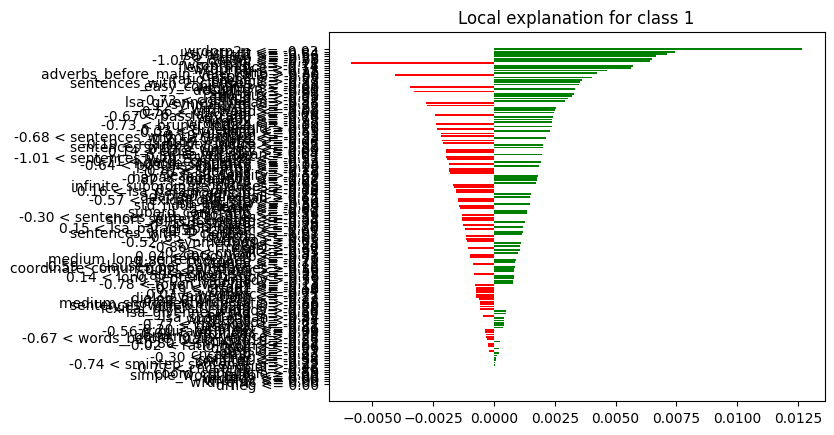

In [100]:
%matplotlib inline
fig = lexp.as_pyplot_figure(label=predicted_score)

In [102]:
lexp.show_in_notebook( labels= (predicted_score, ))

In [11]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
shap_explainer = shap.TreeExplainer(rf_clf)

shap_values = shap_explainer.shap_values(X_test)

## Force Plot Shap


Force Plot do Shap permite que visualizemos como determinadas características impactam positivamente ou negativamente na predição de cada classes. O valor base 0.19999 é media de todas as predições enquanto as barras vermelhas (valores que influencia positivamente) e azul (negativamente) "empurram" a predição para longe do valor base esperado.

In [151]:
instance_idx = 18 
figure = plt.figure()
pred_idx = rf_clf.predict([X_test[i]])[0]
class_idx = Y_test[i]
print("Instance index: ", i)
print("Predicted value: ", class_names[pred_idx])
print("True Value: ", class_names[class_idx])
shap.plots.force(shap_explainer.expected_value[0], shap_values[instance_idx,:,pred_idx], X_test[instance_idx], feature_names = feature_names)

Instance index:  18
Predicted value:  0.5
True Value:  0.5


<Figure size 640x480 with 0 Axes>

## Feature Importance Plot 

Com a biblioteca Shap podemos análisar quais características são mais relevantes para predição de cada classe. No nosso caso, escolhemos analisar 100 exemplos do conjunto de teste e avaliar as características são mais relevantes. Limitamos a quantidade de exemplos devido ao tempo de processamento elevado. Ainda sim, podemos ver como características são realçadas de acordo com a classe.

Feature Importance Plot - Global Interpretation
Classe avaliada:  0.5


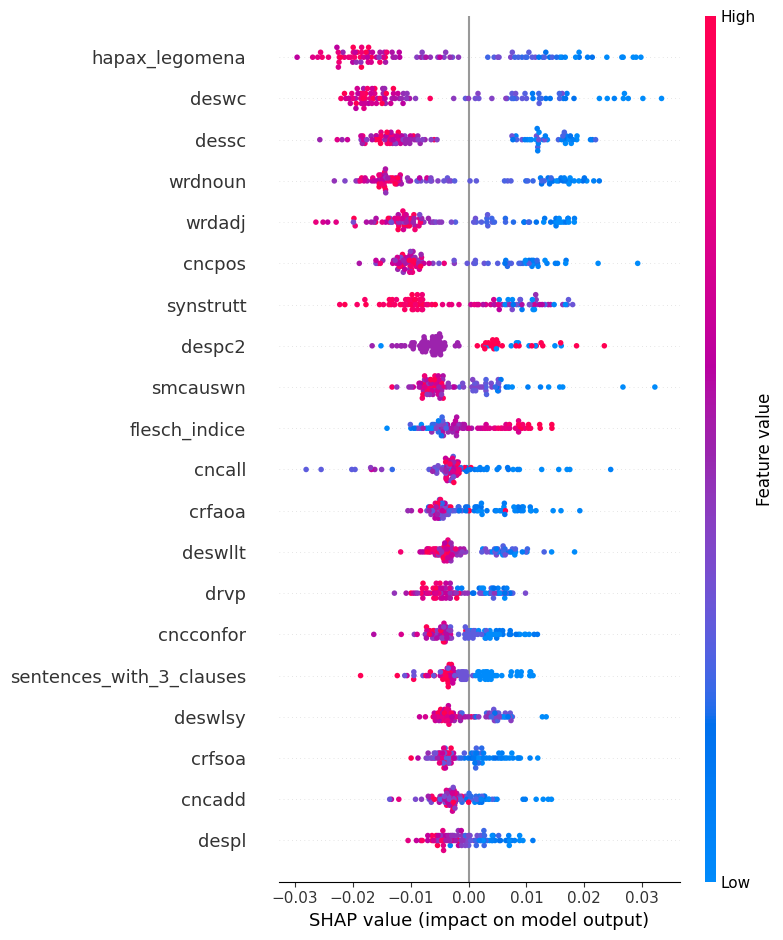

In [147]:
SAMPLE_SIZE = 100
figure = plt.figure()

print("Feature Importance Plot - Global Interpretation")
print("Classe avaliada: ", class_names[class_idx])
shap.summary_plot(shap_values[:SAMPLE_SIZE,:,class_idx], X_test[:SAMPLE_SIZE], feature_names=feature_names)

### Partial Dependence Plot (PDP)


Partial Dependence Plot (PDPs) nos ajudam a entender a intereção entre duas características em relação a saída. No nosso contexto, podemos analisar como as duas principais características, 'hapax_legomena' e 'deswc', na predição da classe 0.5 que representa as notas entre valores 200-400.

In [149]:
X_sample = X_test[:SAMPLE_SIZE]
MAIN_FEATURES = ['hapax_legomena', 'deswc']
feat_idx1, feat_idx2 = np.where( np.isin(feature_names, np.array(MAIN_FEATURES)) )[0]
feat_idx1, feat_idx2

(43, 61)

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

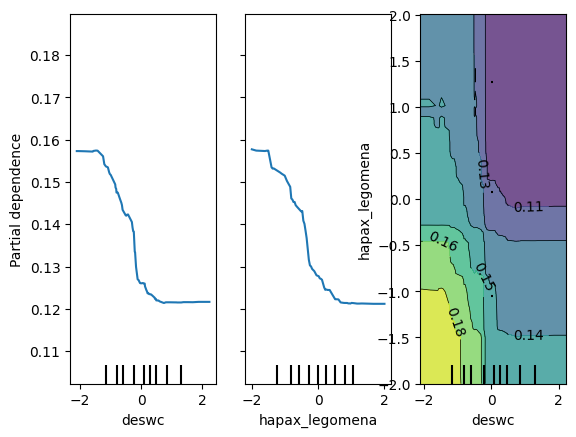

In [152]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
features = [feat_idx1, feat_idx2, (feat_idx1, feat_idx2)]
PartialDependenceDisplay.from_estimator(rf_clf, X_sample,
 features, target=Y_test[instance_idx], feature_names=feature_names)

## Análise Partial Dependece Plot 


Como definido nas celulas anteriores, estamos analisando a instância 18 que obteve uma nota entre 200-400 (abaixo da média) ficando com a classe 0.5. A instância é interessante pelo fato do modelo prever corretamente a nota obtida o que nos ajuda na análise. 
Podemos ver, dessa forma, que duas características extraída fornecidas pelo lexicalDiversityBR e Coh-Metrix e extraídas pela biblioteca aibox-nlp se destacaram como sendo mais influentes para predição da referida classe: [*hapax_legomena*](http://fw.nilc.icmc.usp.br:23380/metrixdoc) e [*deswc*](https://link.springer.com/content/pdf/10.3758/BF03195564.pdf). A característica hapax_legomena computa o aparecemento de palavras raras usadas no texto, computando as palavras que aparecem uma única vez.  Enquanto isso a característica *deswc* avalia o uso de adverbios e adjetivos que poderiam indicam um texto mais descritivo e com mais detalhes. Como podemos analisar na imagem acima, quando ambas métricas tem um baixo valor isso influencia para que a nota predita também seja baixa, ou seja, uma redação com baixo valor de palavras raras (que aparecem uma única vez, *hapax_legomena* ) e baixo valor descritivo (*deswc*) tende a ter uma nota entre os valores 200-400.

*A descrição da característica deswc foi obitida junto ao GPTo-mini
